# Перетворення Лагера

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

## 1.5.1 Многочлени Лаґерра

Функція, що обчислює многочлен Лаґерра порядку n, для заданого значення аргументу t та параметрів beta та sigma

In [196]:
def laguerre_polymonials(
        t: float,
        n: int,
        beta: float = 2.0,
        sigma: float = 4.0
) -> float:
    """
    Функція для обчислення многочлену Лаґерра
    
    :param t:       Значення аргументу
    :param n:       Степінь многочлена Лаґерра
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        Значення многочлена Лаґерра
    """

    # Валідація вхідних даних
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')

    if n < 0:
        raise ValueError('Value "n" must be positive')

    # Найкращі випадки
    l_prev_prev = np.sqrt(sigma) * np.exp(-beta * t / 2)
    l_prev = np.sqrt(sigma) * (1 - sigma * t) * np.exp(-beta * t / 2)
    if n == 0:
        return l_prev_prev
    if n == 1:
        return l_prev

    # Обчислення
    for i in range(2, n + 1):
        temp = l_prev
        l_prev = (2 * i - 1 - sigma * t) * l_prev / i - (i - 1) * l_prev_prev / i
        l_prev_prev = temp

    return l_prev

In [197]:
laguerre_polymonials(
    t=2,
    n=2,
    beta=2,
    sigma=4
)

4.601399630044832

## 1.5.2 Табуляція многочленів Лаґерра

Функція, що табулює многочлен Лаґерра порядку n від 0 до t_max

In [198]:
def laguerre_polynomials_tabulation(
        n: int,
        t_max: float,
        t_step: float = 0.1,
        beta: float = 2.0,
        sigma: float = 4.0
) -> pd.DataFrame:
    """
    Функція для табуляції многочленів Лаґерра
    
    :param n:       Степінь многочлена Лаґерра
    :param t_max:   Максимальне значення аргументу
    :param t_step:  Крок аргументу
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        DataFrame з табульованими значеннями
    """

    # Валідація вхідних даних
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "omega" must be greater than beta')

    if n < 0:
        raise ValueError('Value "n" must be positive')

    if t_max < 0:
        raise ValueError('Value "t_max" must be positive')

    if t_step < 0:
        raise ValueError('Value "t_step" must be positive')

    # Табуляція
    t = np.arange(0, t_max, t_step)
    return pd.DataFrame(
        data={
            't': t,
            f'L_{n}': [laguerre_polymonials(t=i, n=n, beta=beta, sigma=sigma) for i in t]
        }
    ).set_index('t')

In [199]:
laguerre_polynomials_tabulation(
    n=20,
    t_max=5
)

,L_20
t,
0.0,2.000000
0.1,0.148800
0.2,0.369039
0.3,-0.649693
0.4,-0.258386
0.5,0.607406
0.6,0.645354
0.7,-0.112714
0.8,-0.818028


## 1.5.3 Обчислювальний експеримент

Функція, що визначає найменше значення аргументу t, при якому всі поліноми Лаґерра порядку від 0 до n_max — менші за epsilon

In [200]:
def experiment(
        n_max: int = 20,
        epsilon: float = 1e-3,
        t_max: float = 100,
        t_points: int = 1000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> tuple[float, pd.DataFrame]:
    """
    Функція для проведення обчислювального експерименту. Пошук такого t, що |laguerre_polymonials(n, t)| < epsilon для усiх n Є [0, N]
    
    :param n_max:       Верхня межа степеня многочлена Лаґерра
    :param epsilon:     Точність
    :param t_max:       Максимальне значення аргументу
    :param t_points:    Кількість точок для від 0 до t_max
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            Кортеж з t та DataFrame з табульованими значеннями
    """

    # Валідація вхідних даних
    if n_max < 0:
        raise ValueError('Value "N" must be positive')

    if epsilon < 0:
        raise ValueError('Value "epsilon" must be positive')

    if t_max < 0:
        raise ValueError('Value "t_max" must be positive')

    if t_points < 0:
        raise ValueError('Value "t_points" must be positive')

    # Пошук t
    T = np.linspace(0, t_max, t_points)
    N = range(0, n_max + 1)
    suitable_t = None
    for t in T:
        is_t_suitable = True
        for n in N:
            if abs(laguerre_polymonials(t=t, n=n, beta=beta, sigma=sigma)) > epsilon:
                is_t_suitable = False
                break
        if is_t_suitable and suitable_t is None:
            suitable_t = t
            break

    # Табуляція
    return suitable_t, pd.DataFrame(
        data={
            'n': N,
            'L_n': [laguerre_polymonials(t=suitable_t, n=n, beta=beta, sigma=sigma) for n in N]
        }
    ).set_index('n')

In [201]:
t, df = experiment()
print(f't = {t}')
df

t = 79.07907907907908


,L_n
n,
0,9.066138e-35
1,-2.858701e-32
2,4.478343e-30
3,-4.647081e-28
4,3.593209e-26
5,-2.208132e-24
6,1.123332e-22
7,-4.865604e-21
8,1.831625e-19


## 1.5.4 Обчислення значень інтегралів

Функція для обчислення прямого перетворення Лаґерра за допомогою апроксимації інтегралу методом прямокутників

In [202]:
def quad(
        f: Callable[[float], float],
        a: float,
        b: float,
        int_points: int = 10000
) -> float:
    """
    Функція для обчислення наближеного значення інтегралу методом прямокутників
    
    :param f:           Функція, яку інтегруємо
    :param a:           Початок інтервалу
    :param b:           Кінець інтервалу
    :param int_points:  Кількість точок для інтегрування
    
    :return: Значення інтегралу
    """

    x = np.linspace(a, b, int_points)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / int_points


def laguerre_transform(
        f: Callable[[float], float],
        n_max: int,
        int_points: int = 10000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> float:
    """
    Функція для обчислення перетворення Лаґерра
    
    :param f:           Функція, яку перетворюємо
    :param n_max:       Верхня межа степеня многочлена Лаґерра (N)
    :param int_points:  Кількість точок для інтегрування
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            Значення перетворення Лаґерра
    """

    if n_max < 0:
        raise ValueError('Value "n_max" must be positive')

    if int_points < 0:
        raise ValueError('Value "t_step" must be positive')

    # Функція для інтегрування
    def integrand(t):
        alpha = sigma - beta
        return f(t) * laguerre_polymonials(t=t, n=n_max, beta=beta, sigma=sigma) * np.exp(-alpha * t)

    # Верхня межа інтегрування
    t_max = experiment(n_max=n_max, beta=beta, sigma=sigma)[0]

    return quad(integrand, 0, t_max, int_points)


laguerre_transform(
    f=lambda t: np.exp(-t ** 2),
    n_max=20,
    int_points=10000
)

0.008769201060826057

## 1.5.5 Перетворення Лаґерра

Функція для табулювання прямого перетворення Лаґерра порядку від 0 до n_max

In [203]:
def laguerre_transform_tabulation(
        f: Callable[[float], float],
        n_max: int,
        int_points: int = 10000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> pd.DataFrame:
    """
    Функція для табулювання перетворення Лаґерра
    
    :param f:           Функція, яку перетворюємо
    :param n_max:       Верхня межа степеня многочлена Лаґерра (N)
    :param int_points:  Кількість точок для інтегрування
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            DataFrame з табульованими значеннями
    """

    # Валідація вхідних даних
    if n_max < 0:
        raise ValueError('Value "n_max" must be positive')

    if int_points < 0:
        raise ValueError('Value "t_step" must be positive')

    # Табулювання
    N = range(0, n_max)
    return pd.DataFrame(
        data={
            'n': N,
            f'L_n': [laguerre_transform(f=f, n_max=n, beta=beta, int_points=int_points, sigma=sigma) for n in N]
        }
    ).set_index('n')


In [204]:
# Визначення функції
def f(t):
    if t >= 2 * np.pi:
        return 0
    return np.sin(t - np.pi / 2) + 1


# Табулювання
laguerre_transform_tabulation(
    f=f,
    n_max=20,
    int_points=10000
)

,L_n
n,
0,0.066660
1,-0.182204
2,0.178056
3,-0.074283
4,0.007263
5,0.007587
6,-0.003096
7,-0.000615
8,0.000799


## 1.5.6 Обернене перетворення Лаґерра

Функція для обчислення оберненого перетворення Лаґерра. Приймає послідовність коєфіцієнтів h, які можна отримати з табуляції перетворення Лаґерра

In [205]:
def inverse_laguerre_transform(
        h: list[float],
        t: float,
        beta: float = 2.0,
        sigma: float = 4.0
) -> float:
    """
    Функція для обчислення оберненого перетворення Лаґерра
    
    :param h:       Довільна послідовність дійсних чисел
    :param t:       Значення аргументу
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        Значення оберненого перетворення Лаґерра
    """

    # Обчислення
    return sum([h[k] * laguerre_polymonials(t=t, n=k, beta=beta, sigma=sigma) for k in range(0, len(h))])

In [206]:
# Отримуємо послідовність h з табуляції перетворення Лаґерра
h = laguerre_transform_tabulation(
    f=f,
    n_max=20,
    int_points=10000
)['L_n'].tolist()

inverse_laguerre_transform(
    h=h,
    t=2,
)

1.4159688430387627

## 1.5.7 Графік функції Лаґерра

Функція для побудови графіку многочленів Лаґерра порядку від 0 до n_max

In [207]:
def laguerre_polynomials_plot(
        t_max: float,
        n_max: int,
        t_step: float = 0.01,
        beta: float = 2.0,
        sigma: float = 4.0
) -> None:
    """
    Функція для побудови графіку многочленів Лаґерра
    
    :param t_max:   Максимальне значення аргументу
    :param n_max:   Верхня межа степеня многочлена Лаґерра
    :param t_step:  Крок аргументу
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        None
    """

    plt.figure(figsize=(12, 8))

    for n in range(0, n_max + 1):
        l_n_tabulation = laguerre_polynomials_tabulation(
            n=n,
            t_max=t_max,
            t_step=t_step
        )
        plt.plot(l_n_tabulation.index, l_n_tabulation[f'L_{n}'], label='$L_{' + str(n) + '}$')

    plt.title('Многочлени Лаґерра')
    plt.xlabel('t')
    plt.ylabel('$L_n(t)$')
    plt.grid()
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(-0.2, 1)
    )

    plt.show()

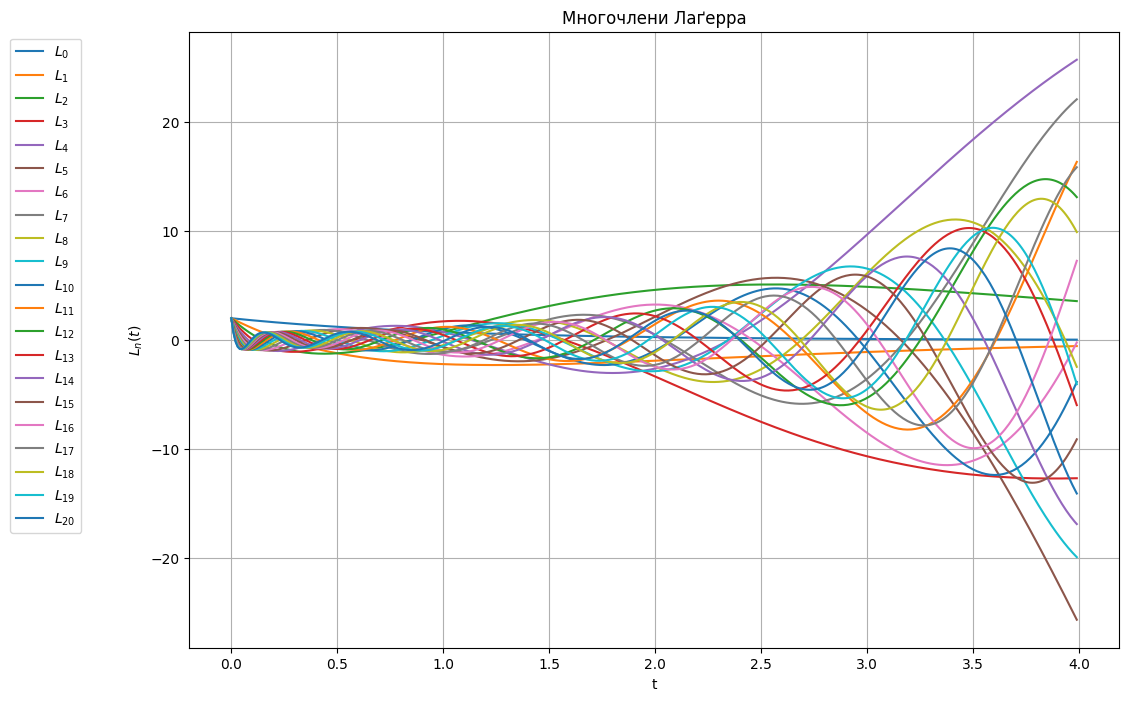

In [208]:
laguerre_polynomials_plot(
    t_max=4,
    n_max=20,
)

## 1.5.8 Графік $\widetilde{f}^N(t), t\in[0, 2\pi]$

Функція для побудови графіків прямого, оберненого перетворення Лаґерра та початкової функції

In [209]:
def laguerre_transform_plot(
        f: Callable[[float], float],
        n_max: int,
        t_max: float = np.pi * 2,
        t_step: float = 0.01,
        int_points: int = 10000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> None:
    """
    Функція для побудови графіку перетворення Лаґерра
    
    :param f:           Функція, яку перетворюємо
    :param n_max:       Верхня межа степеня многочлена Лаґерра (N)
    :param t_max:       Максимальне значення аргументу
    :param t_step:      Крок аргументу
    :param int_points:  Кількість точок для інтегрування
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            None
    """

    # Обчислення послідовності h
    laguerre_transform_tabulation_values = laguerre_transform_tabulation(
        f=f,
        n_max=n_max,
        int_points=int_points,
        beta=beta,
        sigma=sigma
    )
    h = laguerre_transform_tabulation_values['L_n'].tolist()

    # Табулювання
    T = np.arange(0, t_max, t_step)
    inverse_laguerre_transform_tabulation = pd.DataFrame(
        data={
            't': T,
            'h': [inverse_laguerre_transform(h=h, t=t, beta=beta, sigma=sigma) for t in T]
        }
    ).set_index('t')

    # Побудова графіків
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(f'Графік $\\widetilde{{f}}^N(t), t\\in[0, {t_max}]$')

    # Перетворення Лаґерра
    plt.subplot(2, 1, 1)
    plt.plot(
        laguerre_transform_tabulation_values.index,
        laguerre_transform_tabulation_values['L_n'],
    )
    plt.title(f'Перетворення Лаґерра, N = {n_max}')
    plt.xlabel('n')
    plt.ylabel(r'$L_{N}$')
    plt.grid()

    # Обернене перетворення Лаґерра
    plt.subplot(2, 1, 2)
    initial_function_tabulation = pd.DataFrame(
        data={
            't': T,
            'f': [f(t) for t in T]
        }
    ).set_index('t')
    plt.plot(
        initial_function_tabulation.index,
        initial_function_tabulation['f'],
        label='Початкова функція',
        linewidth=6,
        color='black',
        alpha=0.25
    )

    plt.plot(
        inverse_laguerre_transform_tabulation.index,
        inverse_laguerre_transform_tabulation['h'],
        label='Обернене перетворення Лаґерра',
        linewidth=1,
        color='green'
    )

    plt.title('Обернене перетворення Лаґерра')
    plt.xlabel('t')
    plt.ylabel(r'$\widetilde{f}^N(t)$')
    plt.legend()
    plt.grid()

    plt.show()

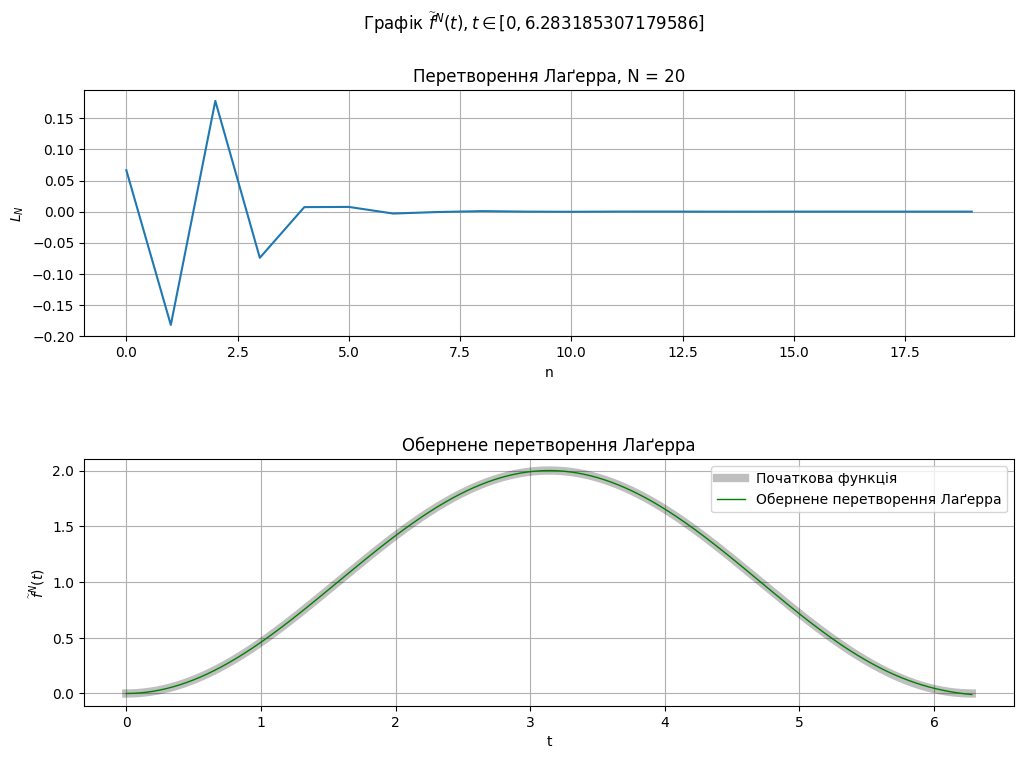

In [210]:
laguerre_transform_plot(
    f=f,
    n_max=20,
    int_points=10000
)

## Графік $\widetilde{g}^N(t), t\in[0, 1]$

Побудова графіків прямого, оберненого перетворення Лаґерра для власної функції g

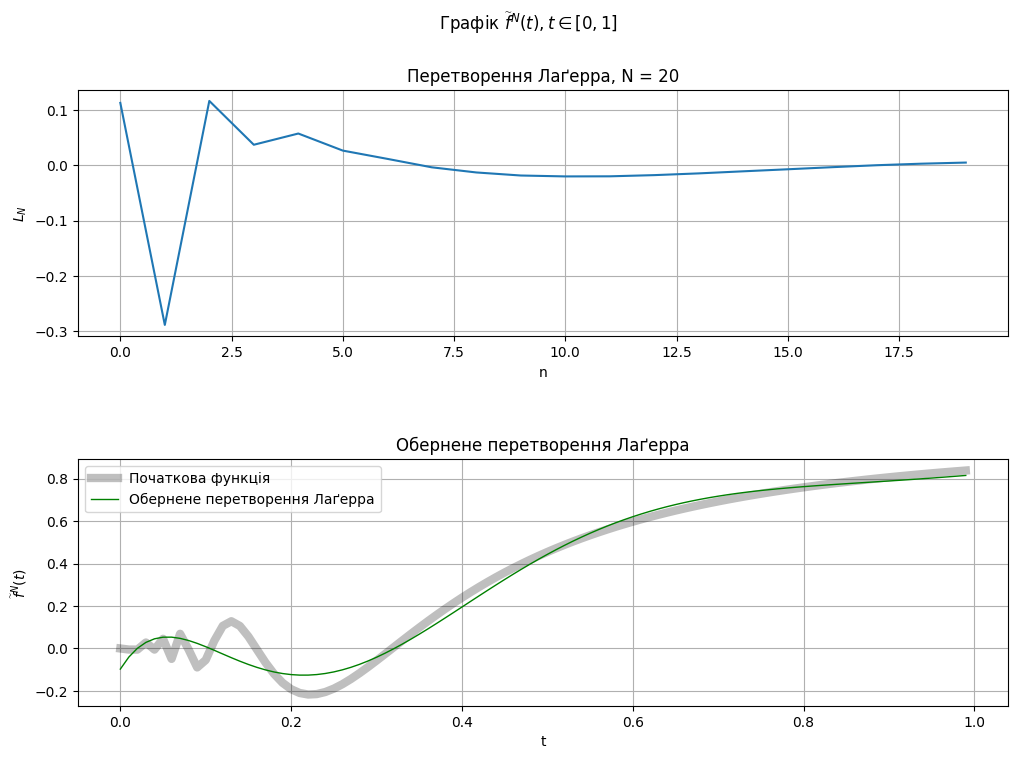

In [211]:
def g(t):
    if t != 0:
        return t * np.sin(1 / t)
    return 0


laguerre_transform_plot(
    f=g,
    n_max=20,
    int_points=10000,
    t_max=1
)

## Висновок

У лабораторній роботі було розглянуто використання многочленів Лаґерра у контексті обчислення їхнього прямого та оберненого перетворення. Були реалізовані функції для обчислення многочленів, їхньої табуляції, проведення обчислювального експерименту для знаходження оптимального значення аргументу t та обчислення перетворень.

В результаті роботи було показано, як можна використовувати многочлени Лаґерра для перетворення функцій та як здійснювати обернене перетворення для відновлення початкових функцій. Проведено аналіз та вивчення залежностей між параметрами многочленів Лаґерра та їхніми властивостями.

Окремий акцент був зроблений на побудові графіків многочленів Лаґерра для різних значень степенів. Це дозволило візуально спостерігати їхні властивості та залежність від параметрів.

Також було проведено аналіз двох функцій, одна з яких була задана, а інша — власна. Для них було побудовано графіки перетворення Лаґерра та оберненого перетворення, що дозволило візуально спостерігати схожість графіку оберненого перетворення та початкової функції.

Отже, лабораторна робота надала можливість здобути практичні навички використання многочленів Лаґерра.